<a href="https://colab.research.google.com/github/possomartin/Notebooks/blob/main/celular_automata.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

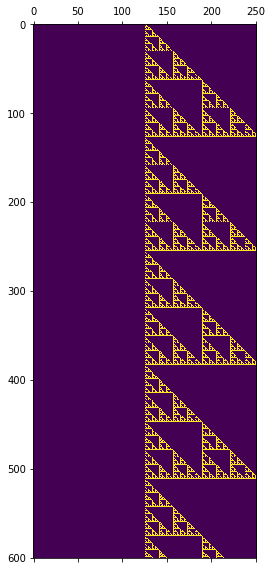

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def rule_to_binary(rule):
    return bin(rule)[2:].rjust(8, '0')[::-1]

def get_neighborhood(CA, cell_i):
    # CA: cellular automata
    return ''.join(CA[cell_i-1:cell_i+2].astype('str'))

def update_automata(CA, binary_rule):
    CAU = CA.copy()  # CAU, state in t+1, CA is in time t

    # Leave out the extemes
    for cell_i in range(1, len(CA)-1):
        CAU[cell_i] = binary_rule[int(get_neighborhood(CA, cell_i), 2)]

    return CAU

def wolfram_initialization(size):
    CA = np.zeros(size, dtype='int')
    CA[len(CA)//2] = 1
    return CA

size = 251  # size of the automata
steps = 600  # time steps
rule = 60  # decimal rule
binary_rule = rule_to_binary(rule)
# init automata
CA = [wolfram_initialization(size)]

# Evolve in time (steps)
for t in range(steps):
    CA += [update_automata(CA[-1], binary_rule)]

plt.matshow(CA)